<a href="https://colab.research.google.com/github/antonellafontanetto/DataScience/blob/main/K_Means_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **K-Means**

[K-Means//Clustering](https://realpython.com/k-means-clustering-python/)

K-means es un algoritmo de clustering no supervisado que se utiliza para agrupar datos similares en K grupos (o clústeres). Es ampliamente usado en análisis exploratorio de datos, compresión, segmentación de clientes y reducción de dimensionalidad.

🔹 **¿Cómo funciona K-means?**

* Elegir K (número de clústeres) que queremos formar.

* Inicializar K centroides (pueden ser aleatorios o usando métodos como K-means++ para mejorar la eficiencia).

* Asignar cada punto de datos al clúster más cercano, es decir, al centroide con menor distancia (generalmente Euclidiana).

* Actualizar los centroides: se recalculan como la media de todos los puntos asignados a cada clúster.

* Repetir los pasos 3 y 4 hasta que:

* Los centroides no cambien (convergencia), o

* Se alcance un número máximo de iteraciones.

🔹 **¿Qué busca optimizar?**

K-means intenta minimizar la suma de las distancias cuadradas entre cada punto y el centroide de su clúster. Esta métrica se llama inercia o Within-Cluster Sum of Squares (WCSS).

🔹 **Ventajas**

* Rápido y eficiente en grandes volúmenes de datos.

* Fácil de implementar y entender.

* Escalable a datasets grandes.

🔹 **Desventajas**

* Requiere especificar K previamente.

* Puede converger a mínimos locales.

* No maneja bien clústeres de formas no esféricas o de tamaño desigual.

* Sensible a outliers y a la inicialización de centroides.

🔹 **Aplicaciones comunes**

* Segmentación de clientes.

* Compresión de imágenes (por colores).

* Detección de patrones en datos no etiquetados.

* Agrupamiento de documentos o textos similares.

In [4]:
import matplotlib.pyplot as plt

import sys

!{sys.executable} -m pip install kneed

import numpy as np

import pandas as pd

from kneed import KneeLocator

from sklearn.datasets import make_blobs

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler

Los algoritmos de aprendizaje automático no deterministas, como k -medias, son difíciles de reproducir. El random_state parámetro se establece en un valor entero para que pueda seguir los datos presentados en el tutorial. En la práctica, es mejor dejar random_state el valor predeterminado None.

In [5]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [21]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [6]:
true_labels[:5]

array([1, 0, 2, 2, 2])

El proceso de transformar características numéricas para usar la misma escala se conoce como escalado de características . Es un paso importante del preprocesamiento de datos para la mayoría de los algoritmos de aprendizaje automático a distancia, ya que puede tener un impacto significativo en el rendimiento del algoritmo.

En este ejemplo, usará la StandardScalerclase . Esta clase implementa un tipo de escalado de características llamado estandarización . La estandarización escala, o desplaza, los valores de cada característica numérica del conjunto de datos para que tengan una media de 0 y una desviación estándar de 1:

In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [8]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

La KMeansclase estimador de scikit-learn es donde se establecen los parámetros del algoritmo antes de ajustar el estimador a los datos. La implementación de scikit-learn es flexible y ofrece varios parámetros ajustables.

Estos son los parámetros utilizados en este ejemplo:

* initControla la técnica de inicialización. La versión estándar del algoritmo k -means se implementa estableciendo initen "random". Al establecerlo en , "k-means++"se emplea un truco avanzado para acelerar la convergencia, que usará más adelante.

* n_clustersEstablece k para el paso de agrupamiento. Este es el parámetro más importante para k -medias.

* n_initEstablece el número de inicializaciones a realizar. Esto es importante porque dos ejecuciones pueden converger en diferentes asignaciones de clúster. El comportamiento predeterminado del algoritmo scikit-learn es realizar diez ejecuciones de k -medias y devolver los resultados de la que tenga el SSE más bajo.

* max_iterEstablece el número máximo de iteraciones para cada inicialización del algoritmo k -means.

In [9]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

Las estadísticas de la ejecución de inicialización con el SSE más bajo están disponibles como atributos kmeansdespués de llamar .fit():

In [10]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [11]:
# The lowest SSE value
kmeans.inertia_

74.57960106819854

In [12]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 1.19539276,  0.13158148],
       [-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732]])

In [13]:
# The number of iterations required to converge
kmeans.n_iter_

10

Finalmente, las asignaciones de clúster se almacenan como una matriz unidimensional de NumPy en kmeans.labels_. A continuación, se muestran las primeras cinco etiquetas predichas:

In [14]:
kmeans.labels_[:5]

array([0, 1, 2, 2, 2], dtype=int32)

### **Método del codo**

Para aplicar el método del codo , ejecute varias k -medias, increméntelas kcon cada iteración y registre la SSE:

In [15]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

Al graficar la SSE en función del número de conglomerados, observe que la SSE continúa disminuyendo a medida que aumenta k. A medida que se agregan más centroides, la distancia de cada punto a su centroide más cercano disminuye.

Existe un punto óptimo donde la curva SSE comienza a curvarse, conocido como el punto de inflexión . Se considera que el valor x de este punto representa un equilibrio razonable entre el error y el número de clústeres. En este ejemplo, el punto de inflexión se encuentra en x=3:

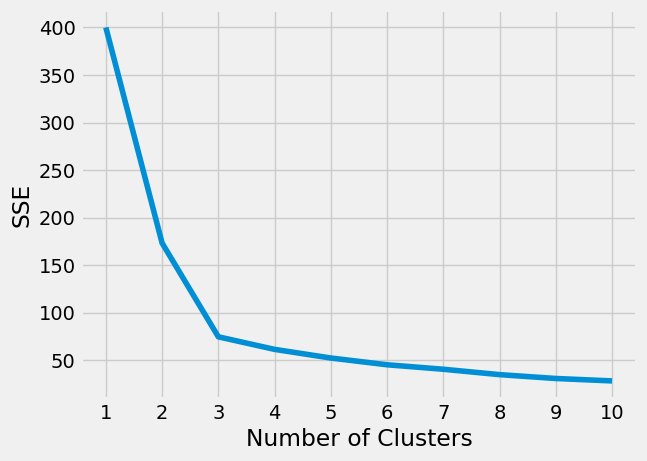

In [17]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Determinar el punto de inflexión en la curva SSE no siempre es sencillo. Si tiene dificultades para elegirlo, puede usar el paquete de Python kneed para identificarlo programáticamente:

In [18]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

np.int64(3)

### **Método de Silueta**

El coeficiente de silueta mide la cohesión y separación de los clústeres. Cuantifica el grado de ajuste de un punto de datos a su clúster asignado en función de dos factores:

Qué tan cerca está el punto de datos de otros puntos del clúster
Qué tan lejos está el punto de datos de los puntos de otros grupos
Los valores del coeficiente de silueta oscilan entre -1y 1. Los valores mayores indican que las muestras están más cerca de sus conglomerados que de otros conglomerados.

En la implementación del coeficiente de silueta en scikit-learn , el coeficiente de silueta promedio de todas las muestras se resume en una sola puntuación. La silhouette score()función requiere un mínimo de dos clústeres; de lo contrario, generará una excepción.

In [19]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

En última instancia, su decisión sobre la cantidad de clústeres a utilizar debe guiarse por una combinación de conocimiento del dominio y métricas de evaluación de agrupamiento.

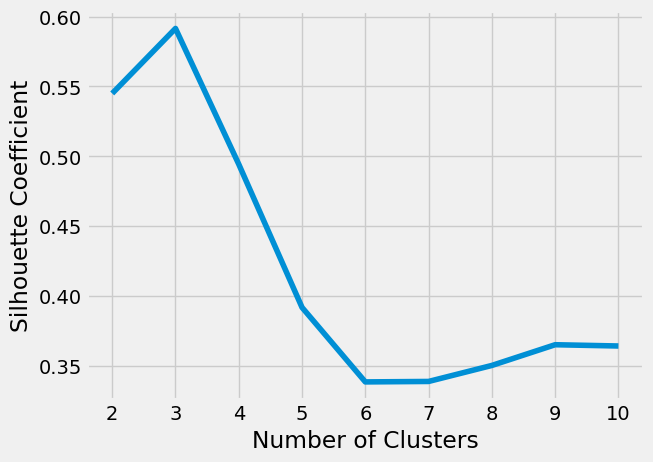

In [20]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# **DBSCAN**

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

Esta vez, utilice make_moons()para generar datos sintéticos en forma de medialunas:

In [22]:
features, true_labels = make_moons(
    n_samples=250, noise=0.05, random_state=42
)
scaled_features = scaler.fit_transform(features)

In [23]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   scaled_features, dbscan.labels_
).round (2)

Imprimir el coeficiente de silueta de cada uno de los dos algoritmos y compárelos. Un coeficiente de silueta más alto sugiere mejores clústeres, lo cual es engañoso en este escenario:

In [24]:
kmeans_silhouette

np.float64(0.5)

In [25]:
dbscan_silhouette

np.float64(0.38)

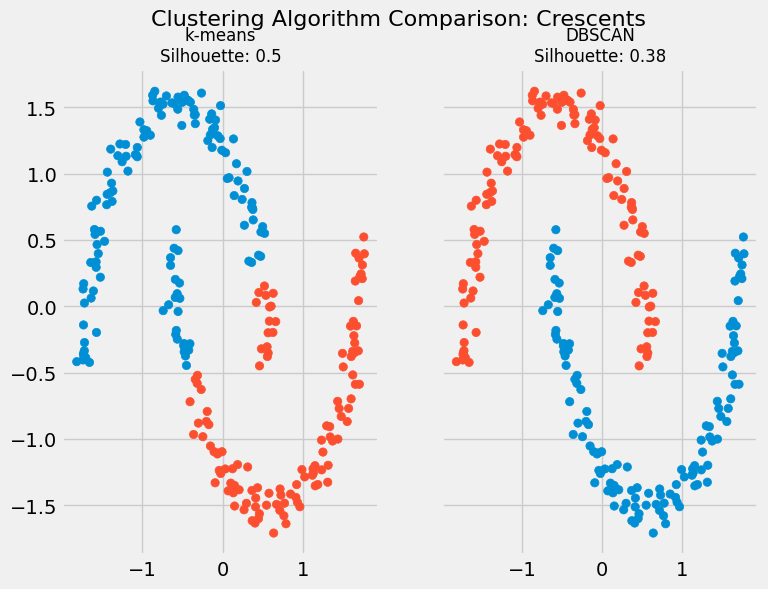

In [26]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(
    f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
plt.show()

Dado que se conocen las etiquetas de la verdad fundamental, es posible utilizar una métrica de agrupamiento que las considere en su evaluación. Se puede usar la implementación en scikit-learn de una métrica común llamada índice rand ajustado (ARI) . A diferencia del coeficiente de silueta, el ARI utiliza asignaciones de clústeres reales para medir la similitud entre las etiquetas verdaderas y las predichas.

In [27]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

In [28]:
round(ari_kmeans, 2)

0.47

In [29]:
round(ari_dbscan, 2)

1.0

Los valores de salida de ARI oscilan entre -1y 1. Una puntuación cercana a 0.0indica asignaciones aleatorias, y una puntuación cercana a 1indica clústeres perfectamente etiquetados.

Según el resultado anterior, se puede observar que el coeficiente de silueta era engañoso. ARI muestra que DBSCAN es la mejor opción para el ejemplo de las medias sintéticas en comparación con k -medias.

Existen varias métricas que evalúan la calidad de los algoritmos de agrupamiento. Revisar las implementaciones en scikit-learn le ayudará a seleccionar la métrica de evaluación de agrupamiento adecuada.